# import necessary package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read data

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Check missing data

In [4]:
# Check Missing data and data types of all collumn 
def check_missing_data(data):
    # Check how many data is missing in every collumn
    total = data.isnull().sum()
    
    # percentage of missing data of every collumn
    percent = total/data.isnull().count() * 100
    
    # Create a table
    table = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    
    # Check data type of every column  and fit it in the table
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
        
    table["Types"] = types
    
    #  Transpose the table
    table = np.transpose(table)
        
    return table


In [5]:
check_missing_data(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,object,int64,object,object,int64,int64,float64,int64,int64,int64,float64,int64


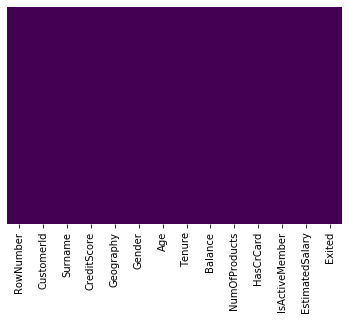

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**No data missing**

In [7]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


This is a bank customer data with 12 feature :
*        RowNumber : This is just count the rownumber
*       CustomerId : The id of a customer
*          Surname : Surname of customer
*      CreditScore : Credit score of a customer
*         Geograpy : The nationality of the customer
*           Gender : Gender of customer
*              Age : Age of customer
*           Tenure : How long their account in this bank
*           Balace : Current Balance of the customer
* NumberOfProducts : Number of product use a customer from the bank
*        HasCrCard : Has the customer credit card or not ! (1 = yes, 0 = No)
*   IsActiveMember : The customer is active or not (1 = yes, 0 = No)
*  EstimatedSalary : Salary of the customer
*           Exited : The customer leaved or not (1 = yes, 0 = No)



**Our goal is to find the cause of leaving the Bank.....**
**That means relations between  Exited collumn to other collumns**

In [8]:
# These collumns have no effect on the target value thats why drop it
data =data.drop(['RowNumber','CustomerId','Surname'],axis=1) 

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Lets try to find the relations with visualization

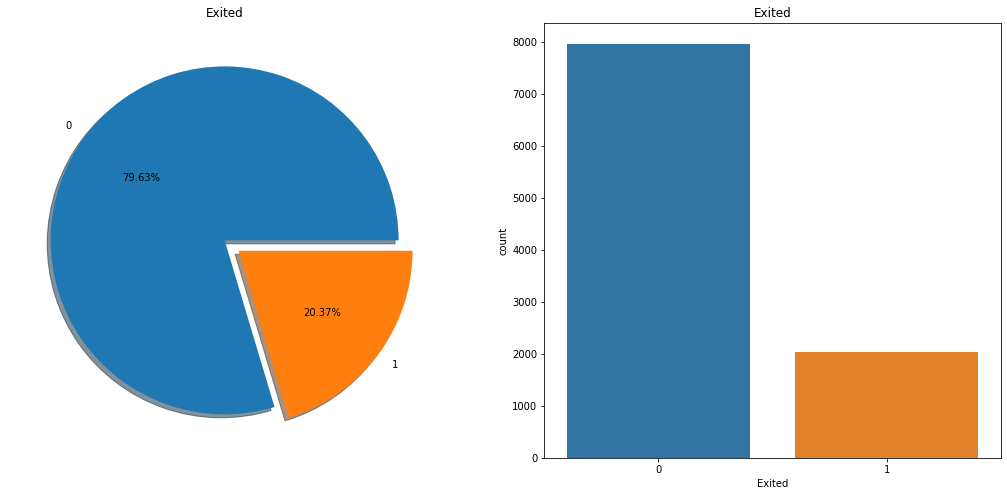

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8)) # Create a sub plot fix figure size
data['Exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0],shadow=True) # Visualize Pie chart
ax[0].set_title('Exited') # Set title of Pie chart
ax[0].set_ylabel('')
sns.countplot('Exited',data=data,ax=ax[1]) # Visualize countplot
ax[1].set_title('Exited') # Set title of countplot
plt.show()

In [12]:
# This function draw a count plot
def count_plot(target,data,hue):
    plt.figure(figsize=(10,6))
    sns.countplot(target,data=data,hue=hue)

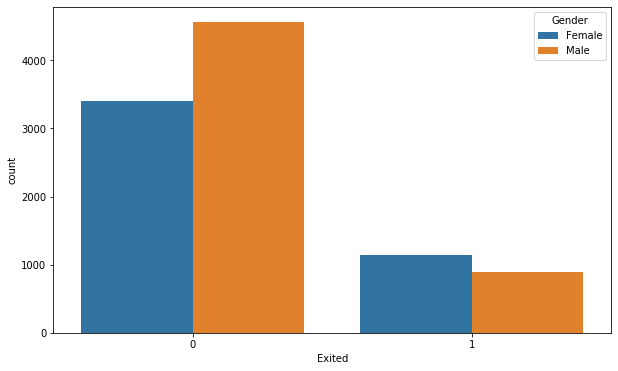

In [13]:
count_plot('Exited',data,'Gender')

**This visualization shows us though the male customers are more than the Female customers but Female customers leaved the bank more than the male customers**

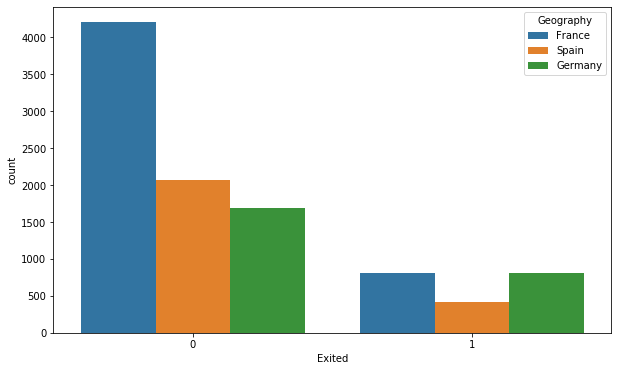

In [14]:
count_plot('Exited',data,'Geography')

**The Frence are the most in the number but Exited rate keeps  Germans the most**

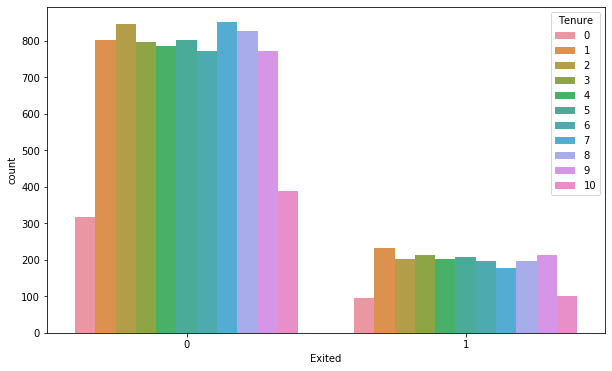

In [15]:
count_plot('Exited',data,'Tenure')

**Younger the account higher the exit rate**

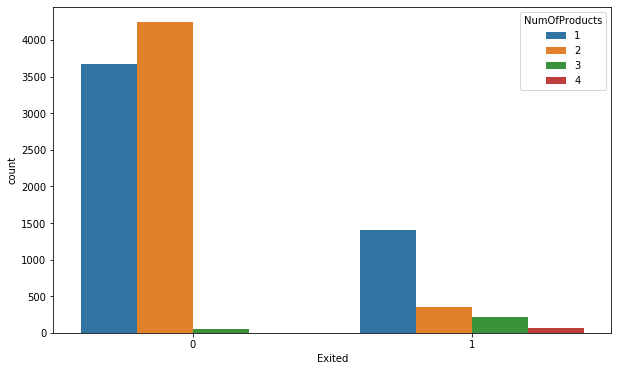

In [16]:
count_plot('Exited',data,'NumOfProducts')

**Less the product use higher the exit rate**

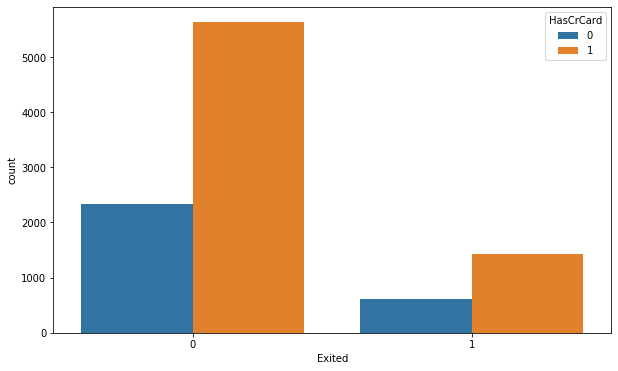

In [17]:
count_plot('Exited',data,'HasCrCard')

**The exit rate of card holders is higher**

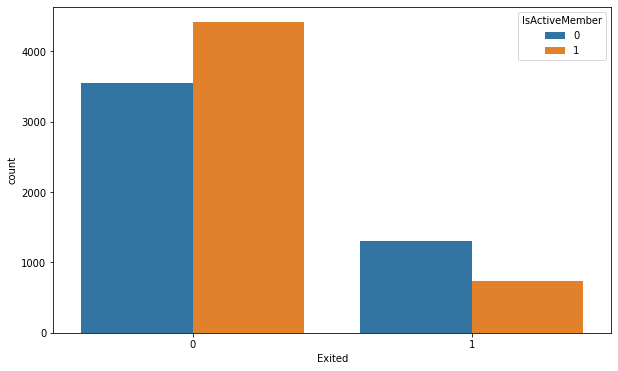

In [18]:
count_plot('Exited',data,'IsActiveMember')

**Inactive members exited the most**

In [19]:
# Create a function that reaturn boxplot
def box_plot(x_axis,y_axis,df,string):
    plt.figure(figsize=(10,6))
    plt.title(string)
    sns.boxplot(x=x_axis,y=y_axis,data = df)

In [20]:
# Create a function that reaturn boxplot
def dis_plot(x_axis,df,bins):
    plt.figure(figsize=(10,6))
    sns.distplot(df[x_axis],bins = bins)

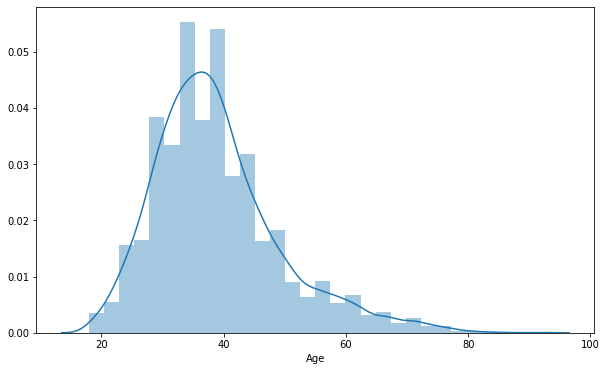

In [21]:
dis_plot('Age',data,30)

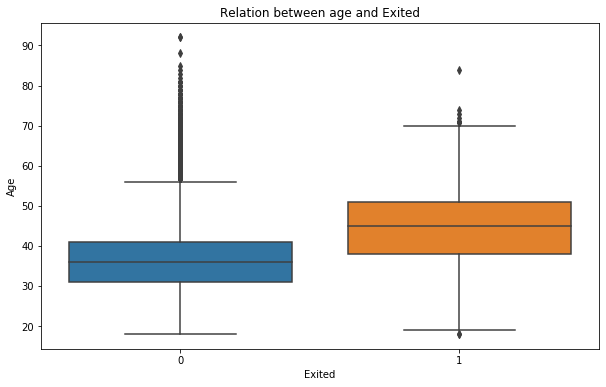

In [22]:
box_plot('Exited','Age',data,'Relation between age and Exited')

**Around 38 to 52 aged customers extited most and 32 to 42 aged customers stayed most**

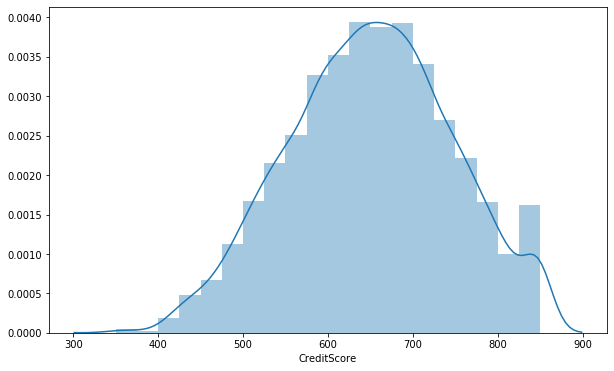

In [23]:
dis_plot('CreditScore',data,20)


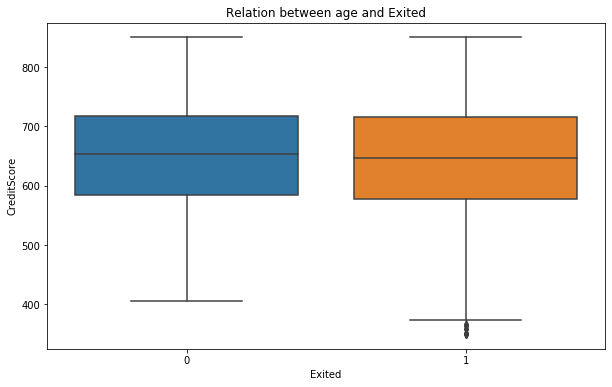

In [24]:
box_plot('Exited','CreditScore',data,'Relation between age and Exited')

**Its didn't show us much information**

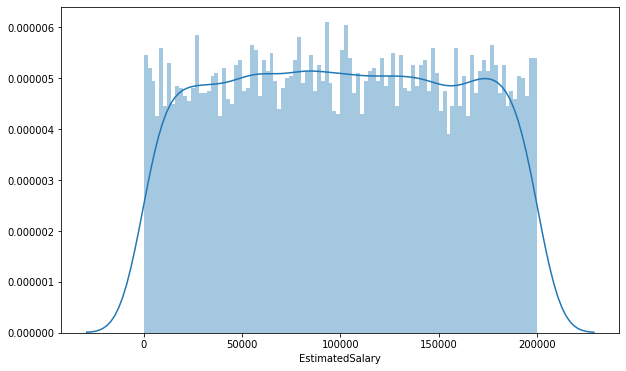

In [25]:
dis_plot('EstimatedSalary',data,100)

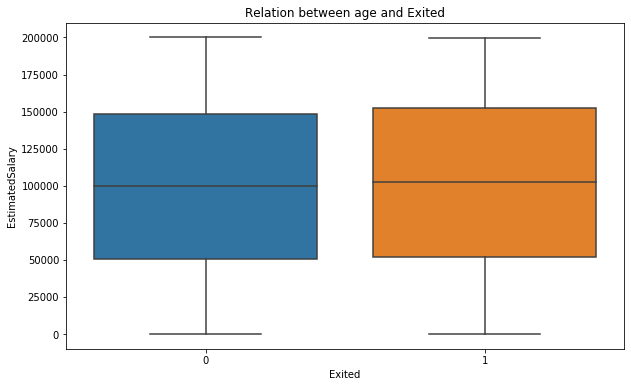

In [26]:
box_plot('Exited','EstimatedSalary',data,'Relation between age and Exited')

**Its also doesn't show us much information**

In [27]:
# Create a function that reaturn boxplot
def box_plot_2(x_axis,y_axis,df,hue):
    plt.figure(figsize=(10,8))
    sns.boxplot(x=x_axis,y=y_axis,data = df,hue=hue)

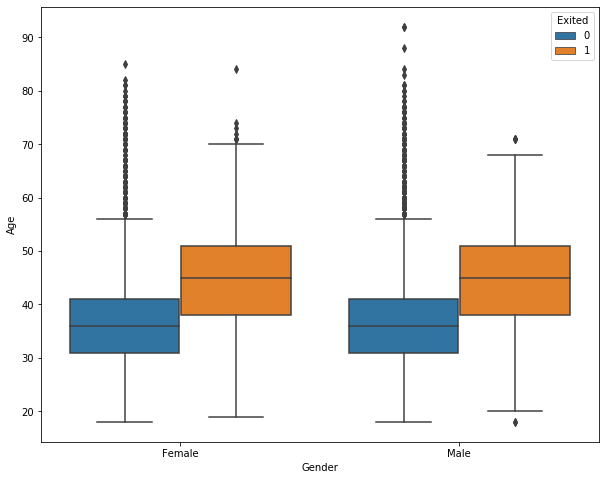

In [28]:
box_plot_2('Gender','Age',data,'Exited')

**For male and Female both case higher aged customers exited rate is high**

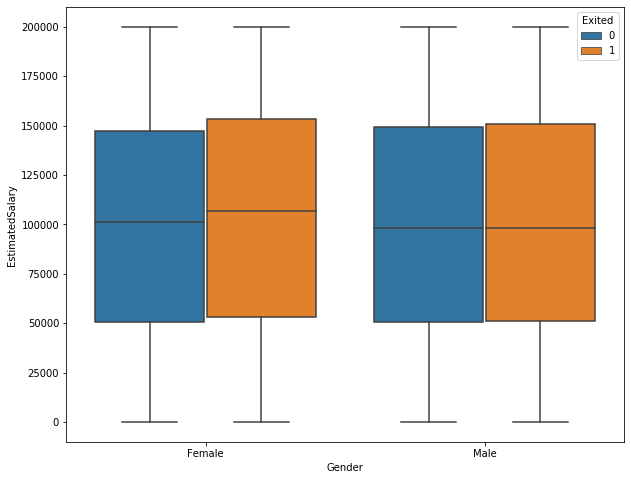

In [29]:
box_plot_2('Gender','EstimatedSalary',data,'Exited')

**No information**

# Feature Importance

In [32]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
from sklearn.preprocessing import LabelEncoder # This package will help us to convert 
lb_make = LabelEncoder()

In [34]:
# Encode training set
data['Geography'] = lb_make.fit_transform(data['Geography'])
data['Gender'] = lb_make.fit_transform(data['Gender'])

In [35]:
feature = data.drop('Exited',axis=1)
target = data['Exited']

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.13344553 0.04025788 0.01604307 0.24526339 0.10428997 0.12857279
 0.13830766 0.0226926  0.03740202 0.13372507]


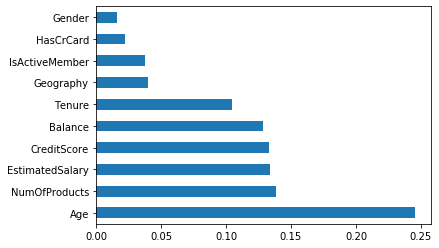

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(feature,target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=feature.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(feature,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(feature.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

             Specs         Score
5          Balance  7.151303e+06
9  EstimatedSalary  4.835088e+04
3              Age  2.300417e+03
8   IsActiveMember  1.181994e+02
0      CreditScore  1.054035e+02
2           Gender  5.153993e+01
1        Geography  1.185325e+01
6    NumOfProducts  5.055394e+00
4           Tenure  3.270538e+00
7        HasCrCard  1.500410e-01


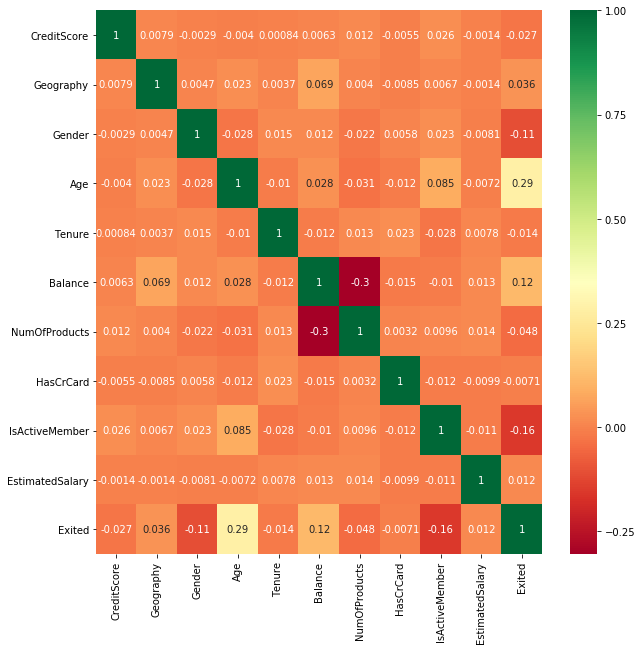

In [38]:
corrmat = data.corr() # Find Corr
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [39]:
corrmat

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
